## Machine Learning Online Class - Exercise 4 Neural Network Learning

  Instructions

------------

  This file contains code that helps you get started on the
  linear exercise. You will need to complete the following functions
  in this exericse:

     sigmoidGradient.m
     randInitializeWeights.m
     nnCostFunction.m

  For this exercise, you will not need to change any code in this file,
  or any other files other than those mentioned above.
> nn_param 是权重矩阵一维展开连接而成
>
> MATLAB源码是沿纵轴展开，我沿横轴展开

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize
sys.path.append('../')
from ex4.predict import predict
from ex4.randInitializeWeights import randInitializeWeights
from ex4.checkNNGradients import checkNNGradients
from ex4.displayData import displayData
from ex4.nnCostFunction import nnCostFunction
from ex4.sigmoidGradient import sigmoidGradient

In [2]:
# Setup the parameters you will use for this exercise

input_layer_size = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10  # 10 labels, from 1 to 10
# (note that we have mapped "0" to label 10)

Loading and Visualizing Data ...


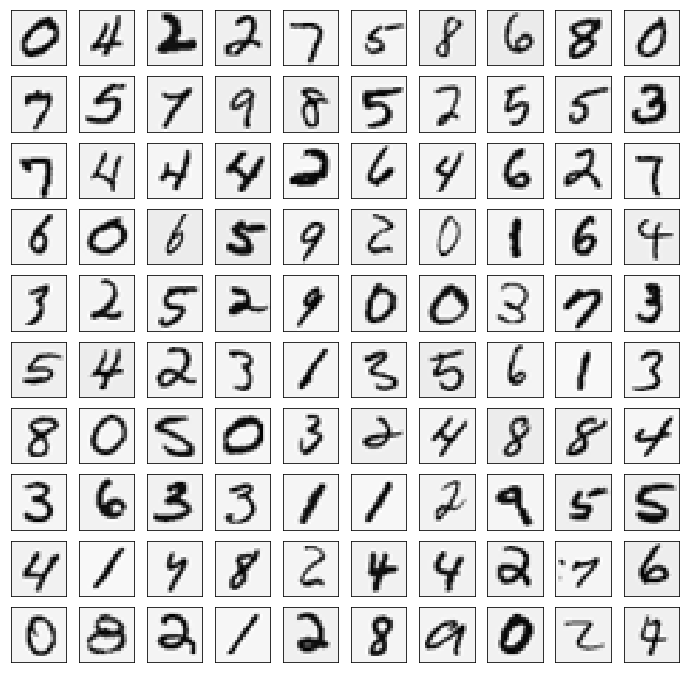

In [3]:
# =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  You will be working with a dataset that contains handwritten digits.

# Load Training Data
print('Loading and Visualizing Data ...')

data = loadmat('ex4data1.mat')  # training data stored in arrays X, y
X = data['X']
y = data['y']

m = y.shape[0]

# Randomly select 100 data points to display
rand_indices = np.random.choice(np.arange(m), 100)
sel = X[rand_indices, :]

displayData(sel)

plt.show()

In [4]:
# ================ Part 2: Loading Parameters ================
# In this part of the exercise, we load some pre-initialized
# neural network parameters.

print('\nLoading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
data = loadmat('ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']
# Unroll parameters

nn_params = np.append(Theta1.flatten(), Theta2.flatten())# 按行展开拼接


Loading Saved Neural Network Parameters ...


In [5]:
# ================ Part 3: Compute Cost (Feedforward) ================
#  To the neural network, you should first start by implementing the
#  feedforward part of the neural network that returns the cost only. You
#  should complete the code in nnCostFunction.m to return cost. After
#  implementing the feedforward to compute the cost, you can verify that
#  your implementation is correct by verifying that you get the same cost
#  as us for the fixed debugging parameters.
#
#  We suggest implementing the feedforward cost *without* regularization
#  first so that it will be easier for you to debug. Later, in part 4, you
#  will get to implement the regularized cost.

print('\nFeedforward Using Neural Network ...')

# Weight regularization parameter (we set this to 0 here).
_lambda = 0

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, _lambda)

print('Cost at parameters (loaded from ex4weights): %f ' % J)
print('(this value should be about 0.287629)')


Feedforward Using Neural Network ...
Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)


In [6]:
# =============== Part 4: Implement Regularization ===============
#  Once your cost function implementation is correct, you should now
#  continue to implement the regularization with the cost.
#

print('\nChecking Cost Function (w/ Regularization) ... ')

# Weight regularization parameter (we set this to 1 here).
_lambda = 1

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, _lambda)

print('Cost at parameters (loaded from ex4weights): %f ' % J)
print('(this value should be about 0.383770)')


Checking Cost Function (w/ Regularization) ... 
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)


In [7]:
# ================ Part 5: Sigmoid Gradient  ================
#  Before you start implementing the neural network, you will first
#  implement the gradient for the sigmoid function. You should complete the
#  code in the sigmoidGradient.m file.

print('\nEvaluating sigmoid gradient...')

g = sigmoidGradient(np.array([[-1, -0.5, 0, 0.5, 1]]))
print('Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:')
print(np.around(g, decimals=4))
print('MATLAB的计算结果是')
print('0.1966    0.2350    0.2500    0.2350    0.1966')


Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [-1 -0.5 0 0.5 1]:
[[0.1966 0.235  0.25   0.235  0.1966]]
MATLAB的计算结果是
0.1966    0.2350    0.2500    0.2350    0.1966


In [8]:
# ================ Part 6: Initializing Pameters ================
#  In this part of the exercise, you will be starting to implment a two
#  layer neural network that classifies digits. You will start by
#  implementing a function to initialize the weights of the neural network
#  (randInitializeWeights.m)

print('\nInitializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.append(initial_Theta1.flatten(),
                              initial_Theta2.flatten())
initial_nn_params.shape


Initializing Neural Network Parameters ...


(10285,)

In [ ]:
# =============== Part 7: Implement Backpropagation ===============
#  Once your cost matches up with ours, you should proceed to implement the
#  backpropagation algorithm for the neural network. You should add to the
#  code you've written in nnCostFunction.m to return the partial
#  derivatives of the parameters.
#
print('\nChecking Backpropagation... \n')

#  Check gradients by running checkNNGradients
checkNNGradients()

In [ ]:
# =============== Part 8: Implement Regularization ===============
#  Once your backpropagation implementation is correct, you should now
#  continue to implement the regularization with the cost and gradient.

print('\nChecking Backpropagation (w/ Regularization) ... \n')

#  Check gradients by running checkNNGradients
_lambda = 3
checkNNGradients(_lambda)

# Also output the costFunction debugging values
debug_J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                            num_labels, X, y, _lambda)
print(debug_J)
print('\n\nCost at (fixed) debugging parameters (w/ _lambda = {:.6f}): {:.6f}'.
      format(_lambda, debug_J))
print('\n(for lambda = 3, this value should be about 0.576051)')

In [ ]:
# =================== Part 8: Training NN ===================
#  You have now implemented all the code necessary to train a neural
#  network. To train your neural network, we will now use "fmincg", which
#  is a function which works similarly to "fminunc". Recall that these
#  advanced optimizers are able to train our cost functions efficiently as
#  long as we provide them with the gradient computations.
#
print('\nTraining Neural Network... \n')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
maxiter = 50

#  You should also try different values of _lambda
_lambda = 1

# Now, costFunction is a function that takes in only one argument (the neural network parameters)
# result = fmin_cg(costFunction, initial_nn_params,args=(), maxiter=maxiter)
# 别把maxiter弄太大，这个很慢很慢很慢很慢很慢很慢很慢很慢很慢很慢很慢
result = minimize(fun=nnCostFunction,
                  x0=initial_nn_params,
                  args=(input_layer_size, hidden_layer_size, num_labels, X, y,
                        _lambda),
                  method='TNC',
                  jac=True,
                  options={'maxiter': maxiter})

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = result.x[0:hidden_layer_size * (input_layer_size + 1)].reshape(hidden_layer_size, input_layer_size + 1)
Theta2 = result.x[(hidden_layer_size * (input_layer_size + 1)):].reshape(num_labels, hidden_layer_size + 1)
result, "结果:", result.x

In [ ]:
# ================= Part 9: Visualize Weights =================
#  You can now "visualize" what the neural network is learning by
#  displaying the hidden units to see what features they are capturing in
#  the data.

print('\nVisualizing Neural Network... \n')

hidden_layer = Theta1[:, 1:]  # ger rid of bias term theta

fig, ax_array = plt.subplots(nrows=5, ncols=5, sharey='all', sharex='all', figsize=(5, 5))

for r in range(5):
    for c in range(5):
        ax_array[r, c].matshow(hidden_layer[5 * r + c].reshape((20, 20)), cmap='gray_r')
plt.xticks([])
plt.yticks([])

plt.show()

In [ ]:
# ================= Part 10: Implement Predict =================
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X)

print('\nTraining Set Accuracy: %f\n' % (np.mean(pred == y) * 100))
print('嫌精度不够大就把maxiter调成100')
print('答案好像每次都不同...')  # 50是88左右，100是95左右